# Proyecto integrador I - Trusted
---
Presentado por:
* Karla Orozco
* Jonathan zapata
* Juan Fernando Gallego

---
### Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Remover formato cientifíco
pd.options.display.float_format = '{:.3f}'.format

---
### Cargar datos

In [4]:
data = pd.read_csv('trusted/data.csv')

In [5]:
company = pd.read_csv('raw/Company.csv')

### Observar datos

In [6]:
data.shape

(3717964, 17)

In [7]:
data.head(2)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,date,ticker_symbol_group,body_trusted,body_tokenized,body_refined,lemmatized_tokens,clean_tweet,score_vader,sentiment,total_engagement
0,550441509175443456,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,2015-01-01,['AAPL'],lx21 made on -Check it out! Learn #howtotr...,"['lx21', 'made', 'on', '-Check', 'it', 'out', ...","['made', 'learn', 'howtotrade']","['made', 'learn', 'howtotrade']",made learn howtotrade,0.000,neutral,1
1,550441672312512512,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,2015-01-01,['AAPL'],Insanity of today weirdo massive selling. bid...,"['Insanity', 'of', 'today', 'weirdo', 'massive...","['insanity', 'today', 'weirdo', 'massive', 'se...","['insanity', 'today', 'weirdo', 'massive', 'se...",insanity today weirdo massive selling bid cent...,-0.827,negative,0


### Organizar formato a las columnas

In [8]:
data['date']=pd.to_datetime(data['date']).dt.date

In [9]:
from ast import literal_eval

In [10]:
data['ticker_symbol_group']=data['ticker_symbol_group'].apply(lambda x: literal_eval(x.replace(' ', ',')))

#### Seleccionar columnas de interés

In [11]:
data=data[['date','total_engagement','ticker_symbol_group','lemmatized_tokens','clean_tweet','score_vader','sentiment']].copy()

In [12]:
data.head(2)

,date,total_engagement,ticker_symbol_group,lemmatized_tokens,clean_tweet,score_vader,sentiment
0,2015-01-01,1,[AAPL],"['made', 'learn', 'howtotrade']",made learn howtotrade,0.000,neutral
1,2015-01-01,0,[AAPL],"['insanity', 'today', 'weirdo', 'massive', 'se...",insanity today weirdo massive selling bid cent...,-0.827,negative


#### Obtener datos de los precios de las acciones

In [13]:
company['ticker_symbol'].values

array(['AAPL', 'GOOG', 'GOOGL', 'AMZN', 'TSLA', 'MSFT'], dtype=object)

In [14]:
import yfinance as yf

In [15]:
prices=yf.download(list(company['ticker_symbol'].values), start="2014-12-31", end="2020-12-31")['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [16]:
prices.head()

,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
Date,,,,,,
2014-12-31,24.984,310.350,524.959,530.660,40.921,44.482
2015-01-02,24.746,308.520,523.373,529.550,41.194,43.862
2015-01-05,24.049,302.190,512.463,519.460,40.815,42.018
2015-01-06,24.051,295.290,500.586,506.640,40.216,42.256
2015-01-07,24.388,298.420,499.728,505.150,40.727,42.190


#### Rellenar las fechas diarias dentro del rango de análisis que no aparecen en los precios descargados, con los datos no nulos de periodos previos:

Crear un DataFrame con las fechas diarias del rango de análisis como índice, nombrado "Date":

In [17]:
price=pd.DataFrame(index=pd.date_range(start="2014-12-31",end="2020-12-31"))
price.index.name='Date'

In [18]:
price.head()

""
Date
2014-12-31
2015-01-01
2015-01-02
2015-01-03
2015-01-04


Concatenar el DataFrame creado con los precios descargador por índice:

In [19]:
price=pd.concat([price,prices],axis=1)

In [20]:
price.head()

,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
Date,,,,,,
2014-12-31,24.984,310.350,524.959,530.660,40.921,44.482
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,24.746,308.520,523.373,529.550,41.194,43.862
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN


Rellenar los datos "NaN" con el los datos no nulos de la fila anterior:

In [21]:
price=price.fillna(method='ffill')

In [22]:
price.head()

,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
Date,,,,,,
2014-12-31,24.984,310.350,524.959,530.660,40.921,44.482
2015-01-01,24.984,310.350,524.959,530.660,40.921,44.482
2015-01-02,24.746,308.520,523.373,529.550,41.194,43.862
2015-01-03,24.746,308.520,523.373,529.550,41.194,43.862
2015-01-04,24.746,308.520,523.373,529.550,41.194,43.862


Validar no vácios:

In [23]:
price.isnull().sum().sum()==0

True

Calcular el cambio porcentual en el precio por día:

In [24]:
change_price=price.pct_change()

In [25]:
change_price.head()

,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
Date,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,0.000,0.000,0.000,0.000,0.000,0.000
2015-01-02,-0.010,-0.006,-0.003,-0.002,0.007,-0.014
2015-01-03,0.000,0.000,0.000,0.000,0.000,0.000
2015-01-04,0.000,0.000,0.000,0.000,0.000,0.000


Eliminar periodos fuera del rango de análisis:

In [26]:
print(change_price.shape)
change_price.drop(['2014-12-31'], inplace=True)
change_price.shape

(2193, 6)


(2192, 6)

In [27]:
change_price.head()

,AAPL,AMZN,GOOG,GOOGL,MSFT,TSLA
Date,,,,,,
2015-01-01,0.000,0.000,0.000,0.000,0.000,0.000
2015-01-02,-0.010,-0.006,-0.003,-0.002,0.007,-0.014
2015-01-03,0.000,0.000,0.000,0.000,0.000,0.000
2015-01-04,0.000,0.000,0.000,0.000,0.000,0.000
2015-01-05,-0.028,-0.021,-0.021,-0.019,-0.009,-0.042


Validar que todas las fechas díarias del rango de análisis se encuentren:

In [28]:
all(pd.date_range(start="2015-01-01",end="2020-12-31").isin(change_price.index))

True

#### Umbral

Se establecerá los valores umbrales, como la mediana +/- 2 desviaciones estandar:

In [29]:
n_desv_est=2

In [30]:
umbrales_inf=change_price.median()-n_desv_est*np.sqrt(change_price.var())
umbrales_sup=change_price.median()+n_desv_est*np.sqrt(change_price.var())

#### Umbral

Se establecerá los valores umbrales, como los bigotes superior e inferior del diagrama de caja y bigotes

{'whiskers': [<matplotlib.lines.Line2D at 0x1305b41bd30>,
 'caps': [<matplotlib.lines.Line2D at 0x1305b42e3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1305b41b790>,
 'medians': [<matplotlib.lines.Line2D at 0x1305b42eaf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1305b42ee80>,
 'means': []}

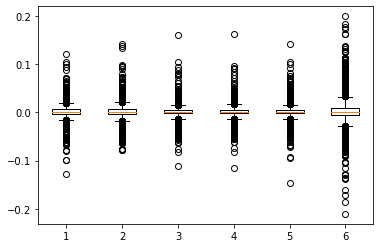

In [30]:
plt.boxplot(change_price)

In [31]:
q1=change_price.apply(lambda x: np.percentile(x, [25]))
q3=change_price.apply(lambda x: np.percentile(x, [75]))

iqr=q3-q1

umbrales_inf=(q1-1.5*iqr).squeeze() #Bigote inferior
umbrales_sup=(q3+1.5*iqr).squeeze() #Bigote superior

In [31]:
pd.DataFrame({'umbral_inferior':umbrales_inf,
              'umbral_superior':umbrales_sup})

,umbral_inferior,umbral_superior
AAPL,-0.031,0.031
AMZN,-0.032,0.032
GOOG,-0.028,0.028
GOOGL,-0.028,0.028
MSFT,-0.029,0.029
TSLA,-0.058,0.058


Gráficar datos:

(<matplotlib.collections.PathCollection at 0x15445cf3fd0>,
 Text(0.5, 1.0, 'TSLA'))

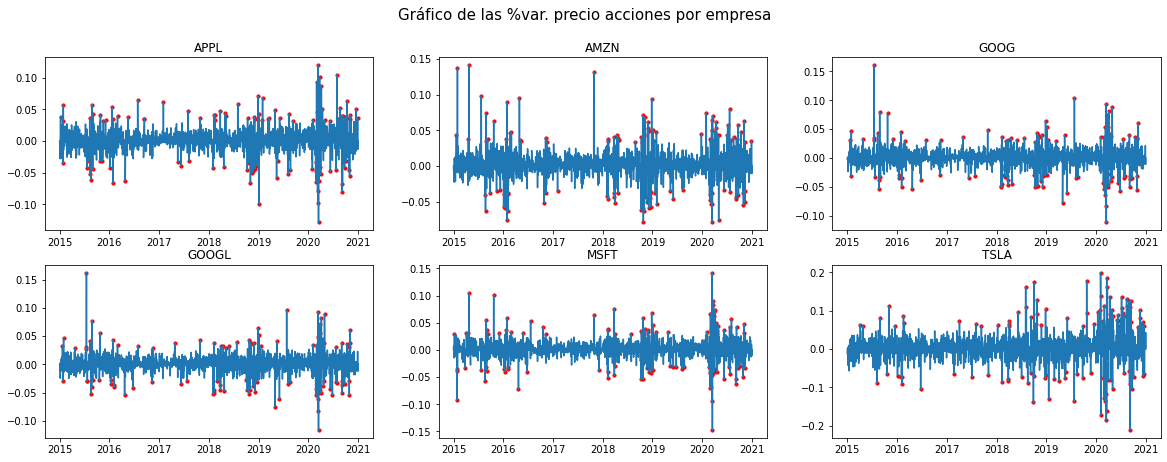

In [32]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))=plt.subplots(2,3,figsize=(20,7))

fig.suptitle('Gráfico de las %var. precio acciones por empresa', fontsize=15)

color_points='r'
size_points=10

def bool_points(ticker_symbol):
    return (change_price[ticker_symbol]>umbrales_sup[ticker_symbol])|(change_price[ticker_symbol]<umbrales_inf[ticker_symbol])
def points_x(ticker_symbol):
    return change_price.index[bool_points(ticker_symbol)]
def points_y(ticker_symbol):
    return change_price[ticker_symbol][bool_points(ticker_symbol)]
    
ax1.plot(change_price['AAPL'])
ax1.scatter(points_x('AAPL'), points_y('AAPL'), color=color_points, s=size_points),ax1.set_title('APPL')

ax2.plot(change_price['AMZN'])
ax2.scatter(points_x('AMZN'), points_y('AMZN'), color=color_points, s=size_points),ax2.set_title('AMZN')

ax3.plot(change_price['GOOG'])
ax3.scatter(points_x('GOOG'), points_y('GOOG'), color=color_points, s=size_points),ax3.set_title('GOOG')

ax4.plot(change_price['GOOGL'])
ax4.scatter(points_x('GOOGL'), points_y('GOOGL'), color=color_points, s=size_points),ax4.set_title('GOOGL')

ax5.plot(change_price['MSFT'])
ax5.scatter(points_x('MSFT'), points_y('MSFT'), color=color_points, s=size_points),ax5.set_title('MSFT')

ax6.plot(change_price['TSLA'])
ax6.scatter(points_x('TSLA'), points_y('TSLA'), color=color_points, s=size_points),ax6.set_title('TSLA')

(<matplotlib.lines.Line2D at 0x1544665f910>,
 <matplotlib.lines.Line2D at 0x154466444f0>)

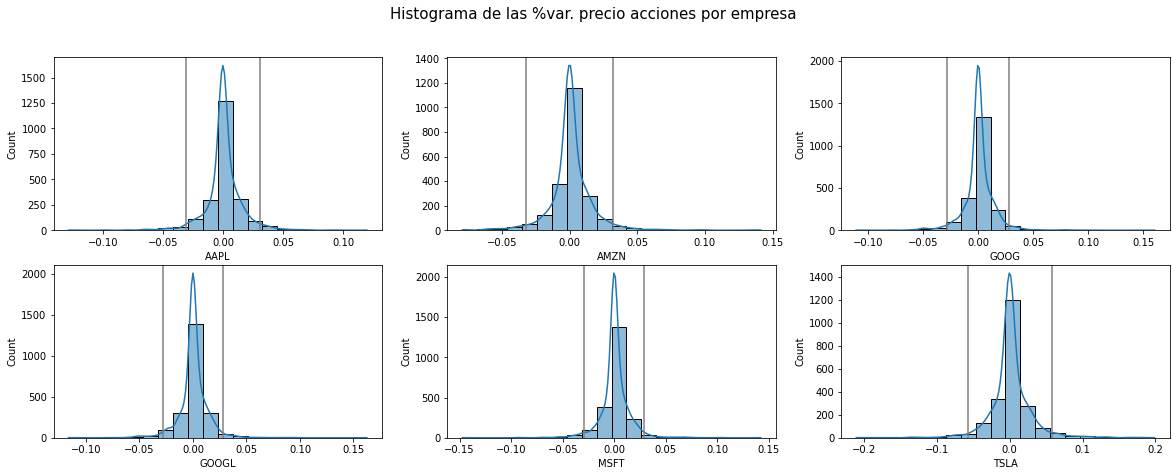

In [34]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))=plt.subplots(2,3,figsize=(20,7))

color='gray'
bins=20

fig.suptitle('Histograma de las %var. precio acciones por empresa', fontsize=15)

sns.histplot(change_price['AAPL'],kde=True,bins=bins,ax=ax1)
ax1.axvline(x=umbrales_inf['AAPL'], color=color),ax1.axvline(x=umbrales_sup['AAPL'], color=color)

sns.histplot(change_price['AMZN'],kde=True,bins=bins,ax=ax2)
ax2.axvline(x=umbrales_inf['AMZN'], color=color),ax2.axvline(x=umbrales_sup['AMZN'], color=color)

sns.histplot(change_price['GOOG'],kde=True,bins=bins,ax=ax3)
ax3.axvline(x=umbrales_inf['GOOG'], color=color),ax3.axvline(x=umbrales_sup['GOOG'], color=color)

sns.histplot(change_price['GOOGL'],kde=True,bins=bins,ax=ax4)
ax4.axvline(x=umbrales_inf['GOOGL'], color=color),ax4.axvline(x=umbrales_sup['GOOGL'], color=color)

sns.histplot(change_price['MSFT'],kde=True,bins=bins,ax=ax5)
ax5.axvline(x=umbrales_inf['MSFT'], color=color),ax5.axvline(x=umbrales_sup['MSFT'], color=color)

sns.histplot(change_price['TSLA'],kde=True,bins=bins,ax=ax6)
ax6.axvline(x=umbrales_inf['TSLA'], color=color),ax6.axvline(x=umbrales_sup['TSLA'], color=color)

### Separar los datos por empresa

#### Paso a paso de la separación

In [35]:
def split_data(x, v_split):
    #columna de listas de tickers
    t=x['ticker_symbol_group']
    #vector de boleanos
    v_bool=t.apply(lambda tikers: np.isin(v_split,tikers))
    #retornar datos filtrados
    return x.loc[v_bool].copy()

In [36]:
AAPL=split_data(data,'AAPL')

In [37]:
AAPL.shape

(1425013, 7)

##### Agrupar los datos por día

Sentimiento:

In [38]:
def n_sentiment(x):
    #tabla cruzada
    sentiment=pd.crosstab(x['date'],x['sentiment'])
    #calcular la sumatoria
    n_tweets=sentiment.apply(lambda x: np.sum(x), axis=1)
    n_tweets.name='n_tweets'
    n_tweets=n_tweets.to_frame()
    #convertir los valores en porcentaje del total
    sentiment=sentiment.apply(lambda x: x/np.sum(x), axis=1)
    #concatenar porcentajes con sumatoria
    sentiment=pd.concat([sentiment,n_tweets], axis=1)
    
    return sentiment

In [39]:
sentiment=n_sentiment(AAPL)

In [40]:
sentiment.head(2)

,negative,neutral,positive,n_tweets
date,,,,
2015-01-01,0.104,0.475,0.421,299
2015-01-02,0.168,0.469,0.362,867


calculos agregados: bow, vector de engagements y suma de engagements por sentimiento

In [41]:
def transform_data(x):
    #campos calculados
    agg=x.groupby(['date','sentiment']).agg(
        bow=('clean_tweet', lambda x: [item for item in x]),
        eng=('total_engagement', lambda x: [item for item in x]),
        sum_eng=('total_engagement',sum),
    ).unstack()
    #rellenar NaN con cero para 'sum_eng'
    agg.sum_eng=agg.sum_eng.fillna(0)
    #concatenar índice multiple en índice único
    agg.columns=agg.columns.map('_'.join)
    return agg

In [42]:
agg=transform_data(AAPL)

In [43]:
#Mostrar
agg.head(2)

,bow_negative,bow_neutral,bow_positive,eng_negative,eng_neutral,eng_positive,sum_eng_negative,sum_eng_neutral,sum_eng_positive
date,,,,,,,,,
2015-01-01,[insanity today weirdo massive selling bid cen...,"[made learn howtotrade, swing trading return d...","[top scoring mega cap right end, cnbc top trad...","[0, 0, 0, 12, 39, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 0, 0, 0, ...","[0, 2, 0, 2, 0, 1, 6, 0, 1, 0, 0, 0, 0, 0, 0, ...",93.000,153.000,1453.000
2015-01-02,"[drop sharply company sued falsifying spec, te...",[either way winnah rt dbbrakebill object real ...,"[weeklyoptions best reading market direction, ...","[1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 4, 0, 0, 2, ...","[1, 0, 16, 0, 0, 0, 10, 2, 0, 0, 1, 0, 0, 1, 2...","[1, 4, 3, 18, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1,...",128.000,1283.000,962.000


In [44]:
agg.shape

(1819, 9)

In [45]:
len(np.unique(AAPL.date))

1819

Concatenar:

In [46]:
AAPL=pd.concat([agg,sentiment], axis=1)

In [47]:
AAPL.head()

,bow_negative,bow_neutral,bow_positive,eng_negative,eng_neutral,eng_positive,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets
date,,,,,,,,,,,,,
2015-01-01,[insanity today weirdo massive selling bid cen...,"[made learn howtotrade, swing trading return d...","[top scoring mega cap right end, cnbc top trad...","[0, 0, 0, 12, 39, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 0, 0, 0, ...","[0, 2, 0, 2, 0, 1, 6, 0, 1, 0, 0, 0, 0, 0, 0, ...",93.000,153.000,1453.000,0.104,0.475,0.421,299
2015-01-02,"[drop sharply company sued falsifying spec, te...",[either way winnah rt dbbrakebill object real ...,"[weeklyoptions best reading market direction, ...","[1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 4, 0, 0, 2, ...","[1, 0, 16, 0, 0, 0, 10, 2, 0, 0, 1, 0, 0, 1, 2...","[1, 4, 3, 18, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1,...",128.000,1283.000,962.000,0.168,0.469,0.362,867
2015-01-03,[spain index like thursday triple top work vis...,"[apple watch probably wo run say vc, today act...","[icycle thin ice week free apple app week, fre...","[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...","[1, 4, 13, 10, 0, 0, 1, 2, 1, 0, 12, 1, 0, 6, ...","[0, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",5.000,159.000,116.000,0.087,0.390,0.523,346
2015-01-04,[killer combination apple pay touch id ibeacon...,"[today apple computer incorporated history, ex...","[free account balance first member ptc, penny ...","[4, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[4, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 11, 0, 1, 1,...","[0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",27.000,156.000,534.000,0.103,0.397,0.500,406
2015-01-05,[bangyman uwochristian shame stupid v discussi...,[new soon virnetx appe talking settlement immi...,[stock contest pick win free tablet enter clic...,"[2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, ...","[1, 0, 0, 9, 0, 0, 0, 2, 0, 1, 2, 0, 1, 13, 0,...","[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ...",201.000,422.000,528.000,0.163,0.414,0.423,1147


In [48]:
AAPL.shape

(1819, 13)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

def dispersion_tweets_content(tweets_cont_list, tweets_eng_list):
    
    #return zero if list´s length is 0 or is nan object
    if ((isinstance(tweets_cont_list, list)) | (isinstance(tweets_eng_list, list))):
        
        #if lists has nan, remove it by its position
        pos_nan=[ind for ind, x in enumerate(tweets_cont_list) if str(x) == 'nan']
        tweets_cont_list=[x for ind, x in enumerate(tweets_cont_list) if not np.isin(ind,pos_nan)]
        tweets_eng_list=[x for ind, x in enumerate(tweets_eng_list) if not np.isin(ind,pos_nan)]
        
        if ((len(tweets_cont_list)==0) | (len(tweets_eng_list)==0)):
            return 0
    else:
        if ((pd.isna(tweets_cont_list)) | (pd.isna(tweets_eng_list))):
            return 0
    
    tfidf_matrix=TfidfVectorizer().fit_transform(tweets_cont_list)
    cosine_sim=linear_kernel(tfidf_matrix, tfidf_matrix) #cosine_similarity
    dispersion_sim=(1-cosine_sim)
    
    tweets_eng_array=np.array(tweets_eng_list)
    unos=np.ones((1,len(tweets_eng_array)))
    tweets_eng_matrix=tweets_eng_array.reshape(1,-1)*(unos.T@unos)
    np.fill_diagonal(tweets_eng_matrix,0)
    
    if np.sum(tweets_eng_matrix)==0:
        return 0
    
    return np.sum(dispersion_sim*tweets_eng_matrix)/np.sum(tweets_eng_matrix)

In [50]:
AAPL['dispersion_negative']=AAPL.apply(lambda x: dispersion_tweets_content(x.bow_negative, x.eng_negative), axis=1)
AAPL['dispersion_neutral']=AAPL.apply(lambda x: dispersion_tweets_content(x.bow_neutral, x.eng_neutral), axis=1)
AAPL['dispersion_positive']=AAPL.apply(lambda x: dispersion_tweets_content(x.bow_positive, x.eng_positive), axis=1)

In [51]:
AAPL=AAPL.assign(dispersion_tweets_content=(AAPL.dispersion_negative*AAPL.sum_eng_negative+
                                            AAPL.dispersion_neutral*AAPL.sum_eng_neutral+
                                            AAPL.dispersion_positive*AAPL.sum_eng_positive)/
                 (AAPL.sum_eng_negative+AAPL.sum_eng_neutral+AAPL.sum_eng_positive))

In [52]:
AAPL.head()

,bow_negative,bow_neutral,bow_positive,eng_negative,eng_neutral,eng_positive,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_negative,dispersion_neutral,dispersion_positive,dispersion_tweets_content
date,,,,,,,,,,,,,,,,,
2015-01-01,[insanity today weirdo massive selling bid cen...,"[made learn howtotrade, swing trading return d...","[top scoring mega cap right end, cnbc top trad...","[0, 0, 0, 12, 39, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 4, 0, 0, 0, ...","[0, 2, 0, 2, 0, 1, 6, 0, 1, 0, 0, 0, 0, 0, 0, ...",93.000,153.000,1453.000,0.104,0.475,0.421,299,0.960,0.972,0.947,0.950
2015-01-02,"[drop sharply company sued falsifying spec, te...",[either way winnah rt dbbrakebill object real ...,"[weeklyoptions best reading market direction, ...","[1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 4, 0, 0, 2, ...","[1, 0, 16, 0, 0, 0, 10, 2, 0, 0, 1, 0, 0, 1, 2...","[1, 4, 3, 18, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1,...",128.000,1283.000,962.000,0.168,0.469,0.362,867,0.991,0.992,0.975,0.985
2015-01-03,[spain index like thursday triple top work vis...,"[apple watch probably wo run say vc, today act...","[icycle thin ice week free apple app week, fre...","[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...","[1, 4, 13, 10, 0, 0, 1, 2, 1, 0, 12, 1, 0, 6, ...","[0, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",5.000,159.000,116.000,0.087,0.390,0.523,346,0.986,0.975,0.909,0.947
2015-01-04,[killer combination apple pay touch id ibeacon...,"[today apple computer incorporated history, ex...","[free account balance first member ptc, penny ...","[4, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[4, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 11, 0, 1, 1,...","[0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...",27.000,156.000,534.000,0.103,0.397,0.500,406,0.981,0.981,0.948,0.956
2015-01-05,[bangyman uwochristian shame stupid v discussi...,[new soon virnetx appe talking settlement immi...,[stock contest pick win free tablet enter clic...,"[2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, ...","[1, 0, 0, 9, 0, 0, 0, 2, 0, 1, 2, 0, 1, 13, 0,...","[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ...",201.000,422.000,528.000,0.163,0.414,0.423,1147,0.976,0.986,0.981,0.982


In [53]:
AAPL.dispersion_tweets_content.describe()

count   1819.000
mean       0.976
std        0.019
min        0.788
25%        0.974
50%        0.981
75%        0.985
max        0.996
Name: dispersion_tweets_content, dtype: float64

In [54]:
AAPL=AAPL.drop(['bow_negative','bow_neutral','bow_positive',
                'eng_negative','eng_neutral','eng_positive',
                'dispersion_negative','dispersion_neutral','dispersion_positive'], axis=1)

Variaciones distinguiendo las que superan los umbrales establecidos:

In [55]:
Y_AAPL=change_price['AAPL'].apply(lambda x: 1 if x>umbrales_sup['AAPL'] else (2 if x<umbrales_inf['AAPL'] else 0)).to_frame()
#Cambiarle el tipo al índice
Y_AAPL.index=Y_AAPL.index.to_series().dt.date
#Renombrar la columna
Y_AAPL.rename(columns={'AAPL': 'Y'}, inplace=True)
#Seleccionar los periodos con datos
Y_AAPL=Y_AAPL.loc[AAPL.index]

In [57]:
Y_AAPL.head()

,Y
date,
2015-01-01,0
2015-01-02,0
2015-01-03,0
2015-01-04,0
2015-01-05,0


Concatenar Y:

In [56]:
AAPL=pd.concat([AAPL,Y_AAPL], axis=1)

In [57]:
AAPL.shape

(1819, 9)

In [58]:
AAPL.head()

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y
date,,,,,,,,,
2015-01-01,93.000,153.000,1453.000,0.104,0.475,0.421,299,0.950,0
2015-01-02,128.000,1283.000,962.000,0.168,0.469,0.362,867,0.985,0
2015-01-03,5.000,159.000,116.000,0.087,0.390,0.523,346,0.947,0
2015-01-04,27.000,156.000,534.000,0.103,0.397,0.500,406,0.956,0
2015-01-05,201.000,422.000,528.000,0.163,0.414,0.423,1147,0.982,2


In [59]:
Y_AAPL2=change_price['AAPL'].to_frame()
#Cambiarle el tipo al índice
Y_AAPL2.index=Y_AAPL2.index.to_series().dt.date
#Renombrar la columna
Y_AAPL2.rename(columns={'AAPL': 'Y2'}, inplace=True)
#Seleccionar los periodos con datos
Y_AAPL2=Y_AAPL2.loc[AAPL.index]

In [60]:
AAPL=pd.concat([AAPL,Y_AAPL2], axis=1)

In [61]:
AAPL.shape

(1819, 10)

In [62]:
AAPL.head()

,sum_eng_negative,sum_eng_neutral,sum_eng_positive,negative,neutral,positive,n_tweets,dispersion_tweets_content,Y,Y2
date,,,,,,,,,,
2015-01-01,93.000,153.000,1453.000,0.104,0.475,0.421,299,0.950,0,0.000
2015-01-02,128.000,1283.000,962.000,0.168,0.469,0.362,867,0.985,0,-0.010
2015-01-03,5.000,159.000,116.000,0.087,0.390,0.523,346,0.947,0,0.000
2015-01-04,27.000,156.000,534.000,0.103,0.397,0.500,406,0.956,0,0.000
2015-01-05,201.000,422.000,528.000,0.163,0.414,0.423,1147,0.982,2,-0.028


In [63]:
AAPL.Y2.value_counts()

0.000     566
0.023       1
0.014       1
0.007       1
0.005       1
         ... 
0.001       1
-0.008      1
-0.001      1
-0.006      1
0.007       1
Name: Y2, Length: 1254, dtype: int64

Revisar que no hayan valores NA:

In [64]:
AAPL.isnull().sum().sum() == 0

True

In [65]:
AAPL.Y.value_counts()

0    1575
2     138
1     106
Name: Y, dtype: int64

### Exportar datos

In [ ]:
AAPL.to_csv('trusted/AAPL.csv')

### Calcular el peso ponderado para realizar gráfico

In [ ]:
def weighted_sum(x):
    eng=x['total_engagement']
    vader=x['score_vader']
    if sum(eng)==0:
        return 0
    else:
        return sum(eng*vader)/sum(eng)

In [ ]:
company.ticker_symbol.values

In [ ]:
for i in company.ticker_symbol.values:
    df=split_data(data,str(i))
    weighted_vader=df.groupby("date").apply(weighted_sum)
    weighted_vader.name=str(i)
    weighted_vader.to_csv('trusted/weighted_vader/'+str(i)+'_weighted_vader.csv')

### Separar los datos para todas las empresas

In [ ]:
company.ticker_symbol.values

In [ ]:
for i in company.ticker_symbol.values:
    df=split_data(data,str(i))
    df_sentiment=n_sentiment(df)
    df_agg=transform_data(df)
    df=pd.concat([df_agg,df_sentiment], axis=1)
    
    df['dispersion_negative']=df.apply(lambda x: dispersion_tweets_content(x.bow_negative, x.eng_negative), axis=1)
    df['dispersion_neutral']=df.apply(lambda x: dispersion_tweets_content(x.bow_neutral, x.eng_neutral), axis=1)
    df['dispersion_positive']=df.apply(lambda x: dispersion_tweets_content(x.bow_positive, x.eng_positive), axis=1)
    df=df.assign(dispersion_tweets_content=(df.dispersion_negative*df.sum_eng_negative+
                                                df.dispersion_neutral*df.sum_eng_neutral+
                                                df.dispersion_positive*df.sum_eng_positive)/
                     (df.sum_eng_negative+df.sum_eng_neutral+df.sum_eng_positive))
    df=df.drop(['bow_negative','bow_neutral','bow_positive',
                'eng_negative','eng_neutral','eng_positive',
                'dispersion_negative','dispersion_neutral','dispersion_positive'], axis=1)
    
    Y_df=change_price[str(i)].apply(lambda x: 1 if x>umbrales_sup[str(i)] else (2 if x<umbrales_inf[str(i)] else 0)).to_frame()
    #Cambiarle el tipo al índice
    Y_df.index=Y_df.index.to_series().dt.date
    #Renombrar la columna
    Y_df.rename(columns={str(i): 'Y'}, inplace=True)
    #Seleccionar los periodos con datos
    Y_df=Y_df.loc[df.index]
    df=pd.concat([df,Y_df], axis=1)
    
    Y_df2=change_price[str(i)].to_frame()
    #Cambiarle el tipo al índice
    Y_df2.index=Y_df2.index.to_series().dt.date
    #Renombrar la columna
    Y_df2.rename(columns={str(i): 'Y2'}, inplace=True)
    #Seleccionar los periodos con datos
    Y_df2=Y_df2.loc[df.index]
    df=pd.concat([df,Y_df2], axis=1)
    
    df.to_csv('trusted/data_company/'+str(i)+'.csv')